In [249]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
import time
from bokeh.resources import INLINE



# Import the Geoapify API key
from api_key import geoapify_key

In [250]:
# Study data files
disaster_path= r"Data/group8_disaster.csv"

# Read the data 
disaster_metadata = pd.read_csv(disaster_path)


# Display the data table for preview
disaster_metadata.head()


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [251]:
#Display the columns of the dataset to drop columns we weren't work with
disaster_metadata.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [252]:
#Drop columns we don't need
clean_disaster_metadata = disaster_metadata.drop(columns=['Glide', 'Seq', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'ISO', 'Start Day','End Day', 'End Year', 'End Month', 'Local Time', 'River Basin', 'No Injured', 'No Affected', 'CPI', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations', """Reconstruction Costs ('000 US$)""",
       '''Insured Damages ('000 US$)''', 'Latitude', 'Longitude', 'Location', 'No Homeless'])

#Set 'Dis No' as index
clean_disaster_metadata = clean_disaster_metadata.set_index('Dis No')

#Drop empty rows
clean_disaster_metadata.drop('2013-0060-RUS', inplace=True)

clean_disaster_metadata.head()


,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Start Year,Start Month,Total Deaths,Total Affected,Total Damages ('000 US$)
Dis No,,,,,,,,,,,,
1970-0013-ARG,1970,Natural,Hydrological,Flood,Argentina,South America,Americas,1970,1.0,36.0,NaN,25000.0
1970-0109-AUS,1970,Natural,Meteorological,Storm,Australia,Australia and New Zealand,Oceania,1970,1.0,13.0,NaN,72475.0
1970-0044-BEN,1970,Natural,Hydrological,Flood,Benin,Western Africa,Africa,1970,9.0,NaN,NaN,200.0
1970-0063-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,11.0,300000.0,3648000.0,86400.0
1970-0026-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,4.0,17.0,110.0,NaN


In [253]:
#Read the column heads of new cleaned dataset
clean_disaster_metadata.columns

Index(['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Country', 'Region', 'Continent', 'Start Year', 'Start Month',
       'Total Deaths', 'Total Affected', 'Total Damages ('000 US$)'],
      dtype='object')

In [254]:
#Total number of unique disaster
clean_disaster_metadata['Year'].count()

14643

In [255]:
# Identify the top three most frequent disasters

# Group all Disaster Types, then calculate and sort the total count in descending order
disaster_counts = clean_disaster_metadata.groupby('Disaster Type').size().reset_index(name='total')
disaster_counts = disaster_counts.sort_values(by='total', ascending=False)
disaster_counts = pd.DataFrame(disaster_counts)
#export table to a csv file
disaster_counts.to_csv("output_data/disaster_counts.csv", index_label="disaster_counts")   

disaster_counts

,Disaster Type,total
5,Flood,5272
10,Storm,4005
3,Epidemic,1436
2,Earthquake,1137
8,Landslide,713
1,Drought,685
4,Extreme temperature,584
12,Wildfire,452
11,Volcanic activity,222
7,Insect infestation,93


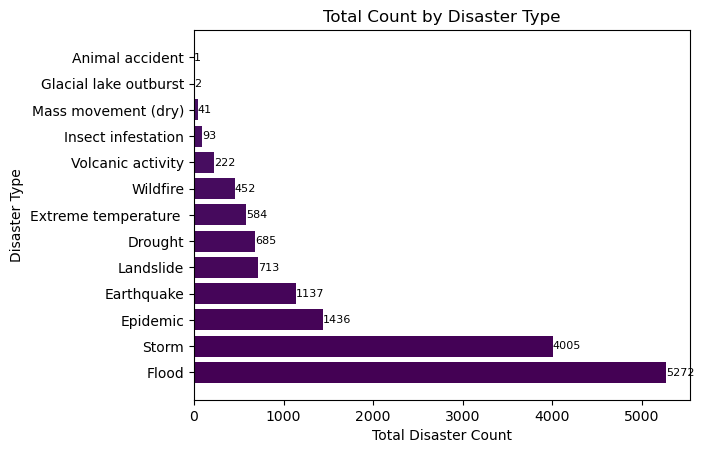

In [256]:
# Plotting using matplotlib for each Disaster Type
plt.barh(disaster_counts['Disaster Type'], disaster_counts['total'], color=plt.colormaps.get_cmap('viridis')(range(len(disaster_counts))))
plt.xlabel('Total Disaster Count')
plt.ylabel('Disaster Type')
plt.title('Total Count by Disaster Type')

# Add text annotations for each bar
for index, value in enumerate(disaster_counts['total']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=8)

# Save the figure
plt.savefig("output_data/Fig1.png", bbox_inches='tight')

# Show figure
plt.show()

In [257]:
# Determine the top three most frequent disasters
top_disasters = disaster_counts['Disaster Type'].value_counts().head(3).index.tolist()
top_disasters 

['Flood', 'Storm', 'Epidemic']

In [258]:
#DataFrame filtering out the top 3 occuring disaster
top_three_data = clean_disaster_metadata[clean_disaster_metadata['Disaster Type'].isin(top_disasters)]
top_three_data

,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Start Year,Start Month,Total Deaths,Total Affected,Total Damages ('000 US$)
Dis No,,,,,,,,,,,,
1970-0013-ARG,1970,Natural,Hydrological,Flood,Argentina,South America,Americas,1970,1.0,36.0,NaN,25000.0
1970-0109-AUS,1970,Natural,Meteorological,Storm,Australia,Australia and New Zealand,Oceania,1970,1.0,13.0,NaN,72475.0
1970-0044-BEN,1970,Natural,Hydrological,Flood,Benin,Western Africa,Africa,1970,9.0,NaN,NaN,200.0
1970-0063-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,11.0,300000.0,3648000.0,86400.0
1970-0026-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,4.0,17.0,110.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-0449-YEM,2021,Natural,Hydrological,Flood,Yemen,Western Asia,Asia,2021,7.0,11.0,67980.0,NaN
2021-0075-ZAF,2021,Natural,Hydrological,Flood,South Africa,Southern Africa,Africa,2021,2.0,31.0,400.0,75000.0
2021-0599-COD,2021,Natural,Biological,Epidemic,Congo (the Democratic Republic of the),Middle Africa,Africa,2021,9.0,131.0,301.0,NaN


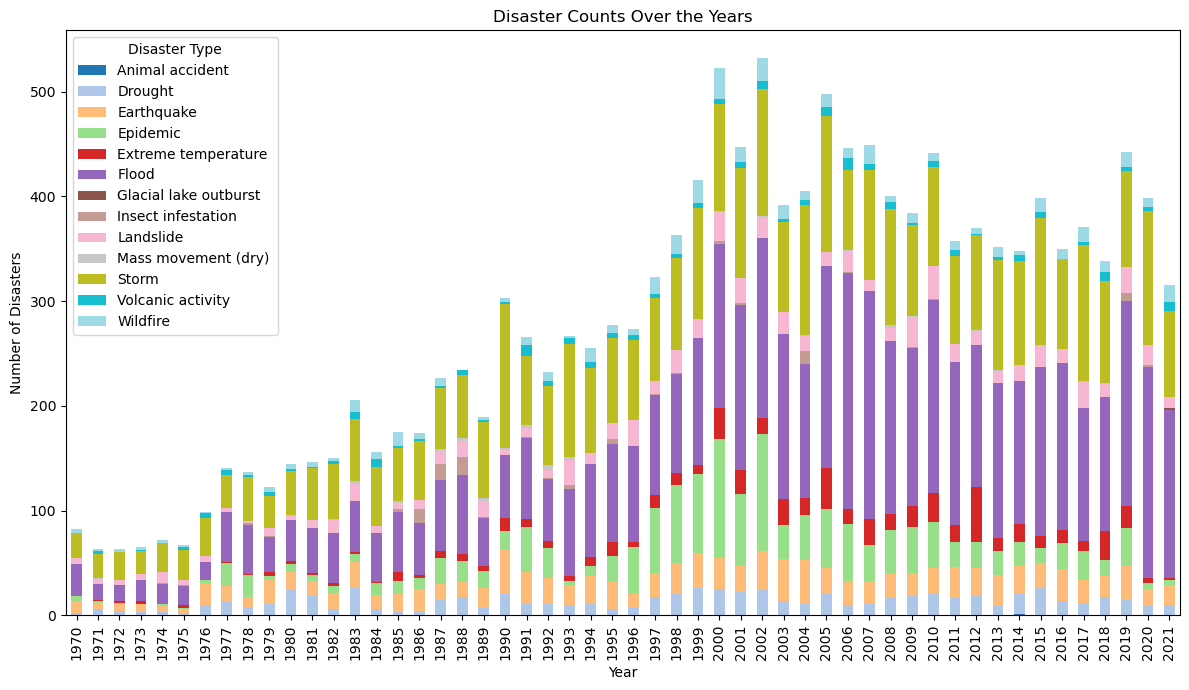

In [259]:
#plot a cluster bar chart over the years against count of disater with different colors in each column
#which disaster was most frequent
disaster_counts = clean_disaster_metadata.groupby(['Year', 'Disaster Type']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Create a stacked bar chart
disaster_counts.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

# Add labels and title
ax.set_title('Disaster Counts Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Disasters')
ax.legend(title='Disaster Type')
ax.set_xticklabels(disaster_counts.index, rotation=90)

# Save the figure
plt.savefig("output_data/Fig2.png", bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

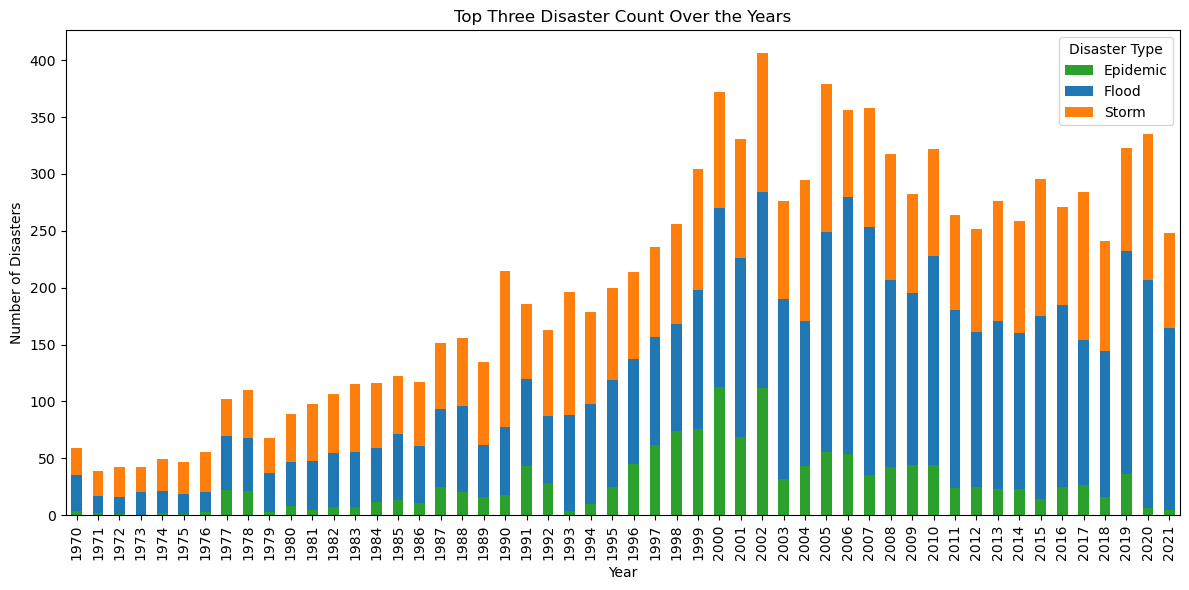

In [260]:
year_disaster_counts = top_three_data.groupby(['Year', 'Disaster Type']).size().unstack().fillna(0)

# List of custom colors
colors = ['#2ca02c', '#1f77b4', '#ff7f0e']  # You can specify any colors you prefer

# Plot clustered bar chart with custom colors
ax = year_disaster_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Top Three Disaster Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend(title='Disaster Type')

# Save the figure
plt.savefig("output_data/Fig4.png", bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

In [261]:
# Group by Year and Continent to get the total number of disasters
disasters_per_year_continent = clean_disaster_metadata.groupby(['Year', 'Continent']).size().unstack(fill_value=0)

#Export to csv file
disasters_per_year_continent.to_csv("output_data/continent_disasters.csv", index_label="continent_disasters")    

disasters_per_year_continent

Continent,Africa,Americas,Asia,Europe,Oceania
Year,,,,,
1970,7,29,37,7,2
1971,7,24,24,4,4
1972,3,13,31,8,8
1973,7,25,22,7,4
1974,6,22,36,4,4
1975,10,18,27,4,8
1976,11,17,43,15,13
1977,22,28,68,11,12
1978,21,21,76,7,12


In [276]:
# Summary Statistics

summary_stats = disasters_per_year_continent[['Africa', 'Americas', 'Asia', 'Europe',	'Oceania']].agg(['sum', 'mean', 'median', 'min', 'max', 'std'])

# Reset index to have 'Continent' as a column for easier reshaping
summary_stats = summary_stats.reset_index()

# Reshape the DataFrame so that continents are in rows and both mean and median statistics are in columns
#summary_stats_df = summary_stats.set_index('Continent')

#Save to CSV file
summary_stats.to_csv("output_data/country_stats.csv", index_label="country_stats")    

# Display the DataFrame
summary_stats

Continent,index,Africa,Americas,Asia,Europe,Oceania
0,sum,2812.000000,3519.000000,5793.000000,1857.000000,662.000000
1,mean,54.076923,67.673077,111.403846,35.711538,12.730769
2,median,53.000000,77.500000,116.000000,33.000000,13.000000
3,min,3.000000,13.000000,22.000000,4.000000,2.000000
4,max,123.000000,118.000000,193.000000,100.000000,26.000000
5,std,36.713435,30.216682,50.410184,24.525566,5.183365


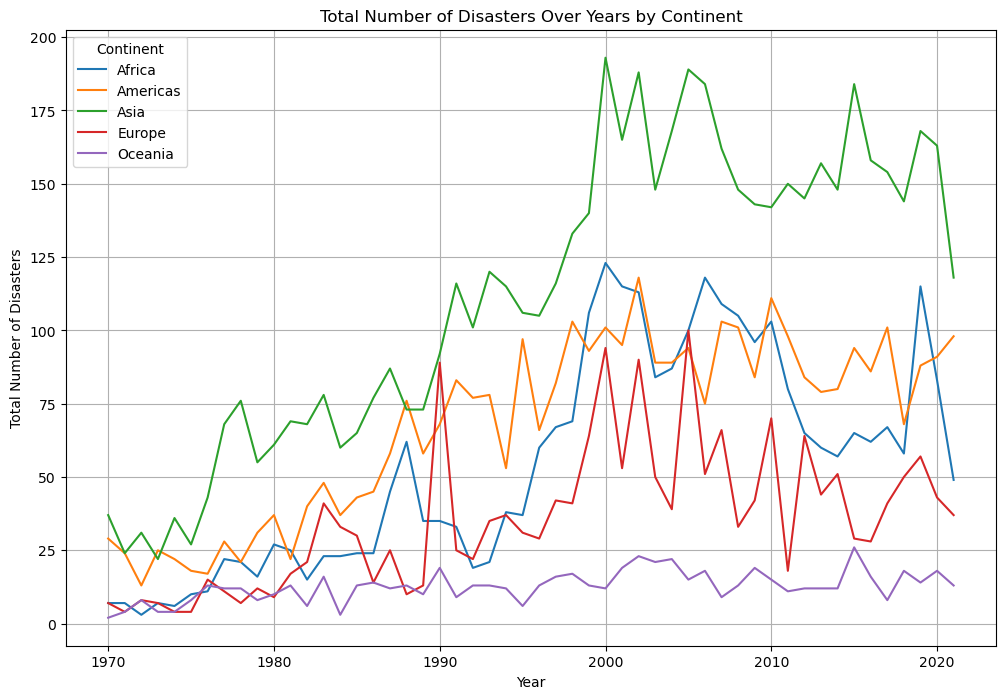

In [263]:
#plot line chart for total number of disasters over years against continents

# Group by Year and Continent to get the total number of disasters
disasters_per_year_continent = clean_disaster_metadata.groupby(['Year', 'Continent']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 8))

for continent in disasters_per_year_continent.columns:
    plt.plot(disasters_per_year_continent.index, disasters_per_year_continent[continent], label=continent)

plt.xlabel('Year')
plt.ylabel('Total Number of Disasters')
plt.title('Total Number of Disasters Over Years by Continent')
plt.legend(title='Continent')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png", bbox_inches='tight')
plt.show()

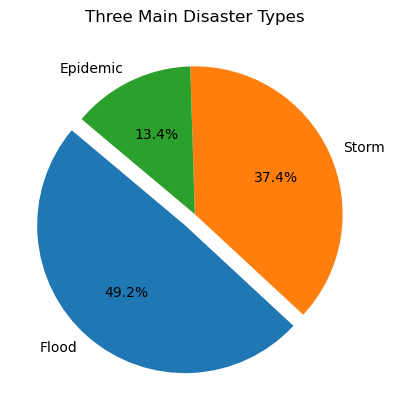

In [264]:
disaster_type = clean_disaster_metadata['Disaster Type'].value_counts()

# Creating a DataFrame for the top 3 disaster types
disaster_type_df = pd.DataFrame(disaster_type).head(3)
disaster_type_df.columns = ['Count']
table = disaster_type_df.reset_index()
table
plt.pie(
    table['Count'],  # Access the 'Count' column for pie values
    labels=table['Disaster Type'],  # Access the 'index' column for labels
    autopct="%1.1f%%",  # Format for displaying percentages
    shadow=False,  # Add shadow for styling
    startangle=140,  # Start angle for the first pie slice
    explode = [0.1, 0, 0]  #Separate the most frequent disaster
)
plt.title("Three Main Disaster Types")

# Save the figure
plt.savefig("output_data/Fig5.png")
plt.show()

In [265]:
#Unique countries observed in this dataset and their total number of disasters
#Number of times each country was affected by a disaster
# Aggregation by Country
country_aggregation = clean_disaster_metadata.groupby('Country').agg({
    'Total Deaths': 'sum',
    'Total Affected': 'sum',
    "Total Damages ('000 US$)": 'sum'
}).reset_index()
country_aggregation_df=pd.DataFrame(country_aggregation)
country_aggregation_df

,Country,Total Deaths,Total Affected,Total Damages ('000 US$)
0,Afghanistan,22939.0,34360790.0,578120.0
1,Albania,264.0,4384418.0,783573.0
2,Algeria,7089.0,1961229.0,11783846.0
3,American Samoa,40.0,25563.0,205000.0
4,Angola,6222.0,7303362.0,12000.0
...,...,...,...,...
223,Yemen Arab Rep,1657.0,604362.0,2012700.0
224,Yemen P Dem Rep,507.0,705000.0,1040200.0
225,Yugoslavia,298.0,330014.0,2421100.0
226,Zambia,1420.0,11548950.0,20900.0


In [266]:
# Function to get latitude and longitude of a country
def get_country_lat_long(country, api_key):
    url = f"https://api.geoapify.com/v1/geocode/search?text={country}&apiKey={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses
        data = response.json()
        if data['features']:
            latitude = data['features'][0]['geometry']['coordinates'][1]
            longitude = data['features'][0]['geometry']['coordinates'][0]
            return latitude, longitude
        else:
            print(f"No results found for {country}. Response: {data}")
            return None, None
    except requests.RequestException as e:
        print(f"Error fetching data for {country}. Error: {e}")
        return None, None

# Ensure columns for latitude and longitude are initialized
if 'Lat' not in country_aggregation_df.columns:
    country_aggregation_df["Lat"] = None
if 'Lng' not in country_aggregation_df.columns:
    country_aggregation_df["Lng"] = None

# Get latitudes and longitudes for each country and update the disaster_countries_df DataFrame
for index, row in country_aggregation_df.iterrows():
    country = row['Country']
    lat, long = get_country_lat_long(country, geoapify_key)
    if lat is not None and long is not None:
        print(f"{country}: Latitude = {lat}, Longitude = {long}")
        country_aggregation_df.at[index, 'Lat'] = lat
        country_aggregation_df.at[index, 'Lng'] = long
    else:
        print(f"Could not get coordinates for {country}")
        
# Verify that no extra rows labeled 'Lat' and 'Lng' are present
if 'Lat' in country_aggregation_df.index:
    country_aggregation_df.drop('Lat', inplace=True)
if 'Lng' in country_aggregation_df.index:
    country_aggregation_df.drop('Lng', inplace=True)

country_aggregation_df.to_csv("output_data/country_coordinates.csv", index_label="country_coordinates")    

Afghanistan: Latitude = 33.7680065, Longitude = 66.2385139
Albania: Latitude = 41.000028, Longitude = 19.9999619
Algeria: Latitude = 28.0000272, Longitude = 2.9999825
American Samoa: Latitude = -14.297124, Longitude = -170.7131481
Angola: Latitude = -11.8775768, Longitude = 17.5691241
Anguilla: Latitude = 18.1954947, Longitude = -63.0750234
Antigua and Barbuda: Latitude = 17.2234721, Longitude = -61.9554608
Argentina: Latitude = -34.9964963, Longitude = -64.9672817
Armenia: Latitude = 4.536307, Longitude = -75.6723751
Australia: Latitude = -24.7761086, Longitude = 134.755
Austria: Latitude = 47.59397, Longitude = 14.12456
Azerbaijan: Latitude = 40.3936294, Longitude = 47.7872508
Azores Islands: Latitude = 11.6522768, Longitude = 92.7314601
Bahamas (the): Latitude = 24.669637, Longitude = -78.018505
Bahrain: Latitude = 26.1551249, Longitude = 50.5344606
Bangladesh: Latitude = 24.4769288, Longitude = 90.2934413
Barbados: Latitude = 13.1500331, Longitude = -59.5250305
Belarus: Latitude = 

In [267]:
#print the Dataframe
country_aggregation_df

,Country,Total Deaths,Total Affected,Total Damages ('000 US$),Lat,Lng
0,Afghanistan,22939.0,34360790.0,578120.0,33.768006,66.238514
1,Albania,264.0,4384418.0,783573.0,41.000028,19.999962
2,Algeria,7089.0,1961229.0,11783846.0,28.000027,2.999983
3,American Samoa,40.0,25563.0,205000.0,-14.297124,-170.713148
4,Angola,6222.0,7303362.0,12000.0,-11.877577,17.569124
...,...,...,...,...,...,...
223,Yemen Arab Rep,1657.0,604362.0,2012700.0,-20.335,57.40056
224,Yemen P Dem Rep,507.0,705000.0,1040200.0,-34.627749,-58.830283
225,Yugoslavia,298.0,330014.0,2421100.0,23.041237,-81.526142
226,Zambia,1420.0,11548950.0,20900.0,-14.518912,27.558988


In [268]:
%%capture --no-display
# Geographical questions:
#Which regions and countries have been most affected by
#natural disasters?(Use API to plot it)(use lng/lat)
#show number of death based on size of circles in map


# Ensure the correct data types
country_aggregation_df['Lat'] = pd.to_numeric(country_aggregation_df['Lat'], errors='coerce')
country_aggregation_df['Lng'] = pd.to_numeric(country_aggregation_df['Lng'], errors='coerce')
country_aggregation_df['Total Deaths'] = pd.to_numeric(country_aggregation_df['Total Deaths'], errors='coerce')
country_aggregation_df['Country'] = country_aggregation_df['Country'].astype(str)
clean_disaster_metadata['Disaster Type'] = clean_disaster_metadata['Disaster Type'].astype(str)

# Drop rows with NaN values in Lat, Lng, or Total Deaths
country_aggregation_df.dropna(subset=['Lat', 'Lng', 'Total Deaths'], inplace=True)

# Ensure there are no mixed types in any columns
print(country_aggregation_df.dtypes)

# Configure the map plot
map_plot = country_aggregation_df.hvplot.points(
    'Lng', 'Lat', 
    geo=True,
    tiles='OSM',
    frame_width=700,
    frame_height=500,
    size='Total Deaths',
    scale=0.1,
    color='Country',
    hover_cols=['Disaster Type'],
    alpha = 0.4
)

#Save interactive map
hvplot.save(map_plot, 'output_data/worldplot_disaster.html', resources=INLINE)

# Display the map
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Country,Total Deaths)

In [269]:
# Assuming `top_three_season_counts` and `top_disasters` are defined as in your original code

# Define month names for labeling
month_names = pd.to_datetime([f'2024-{i:02d}-01' for i in range(1, 13)]).strftime('%B')
month_names

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

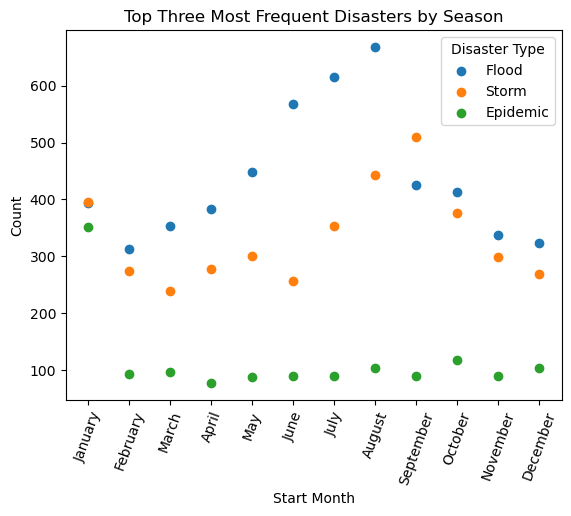

In [270]:
# Assuming `top_three_season_counts` and `top_disasters` are defined as in your original code

# Select relevant columns
selected_columns = ['Disaster Type', 'Start Month']
filtered_df = clean_disaster_metadata[selected_columns]

# Drop rows with NaN values in the 'Start Month' column
cleaned_df = filtered_df.dropna(subset=['Start Month'])

# Determine the top three most frequent disasters
top_disasters = cleaned_df['Disaster Type'].value_counts().head(3).index.tolist()

# Filter the DataFrame for only the top three disaster types
filtered_top_disasters_df = cleaned_df[cleaned_df['Disaster Type'].isin(top_disasters)]

# Scatter Chart for Top Three Most Frequent Disasters vs. Seasons
top_three_season_counts = top_three_data.groupby(['Start Month', 'Disaster Type']).size().unstack()
#___________________________________________________________________________________________________________

# Define month names for labeling
month_names = pd.date_range(start='2024-01-01', periods=12, freq='ME').strftime('%B')

# Create a dictionary mapping month numbers to month names
month_mapping = {i+1: name for i, name in enumerate(month_names)}

# Scatter Plot
for disaster in top_disasters:
    plt.scatter(top_three_season_counts.index, top_three_season_counts[disaster], label=disaster)

plt.title('Top Three Most Frequent Disasters by Season')
plt.xlabel('Start Month')
plt.ylabel('Count')

# Set month names as x-ticks with vertical rotation
plt.xticks(ticks=top_three_season_counts.index, labels=[month_mapping.get(i, '') for i in top_three_season_counts.index], rotation=70)

plt.legend(title='Disaster Type')

# Save the figure
plt.savefig("output_data/Fig6.png", bbox_inches='tight')
plt.show()

/var/folders/88/s9w214wx7036sclkp3xhfnh40000gn/T/ipykernel_33251/2564442674.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_top_disasters_df['Season'] = filtered_top_disasters_df['Start Month'].apply(month_to_season)


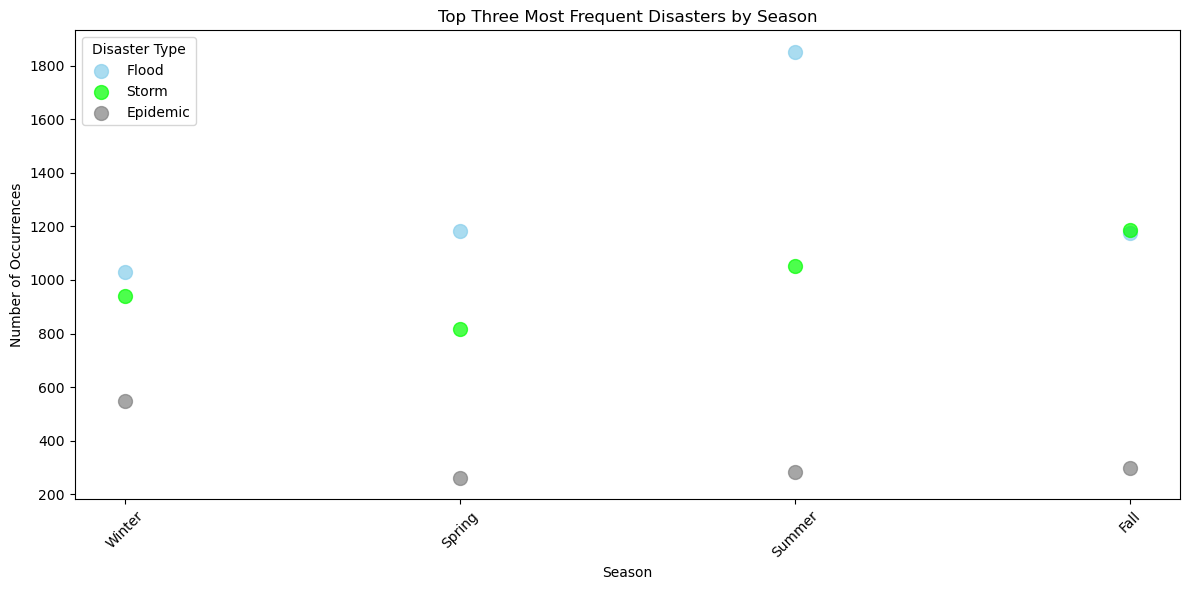

In [271]:
# Sample DataFrame (replace this with your actual DataFrame)
# disaster_metadata = pd.DataFrame({
#     'Disaster Type': ['Flood', 'Earthquake', 'Flood', 'Fire', 'Earthquake', 'Storm', 'Flood', 'Flood', 'Storm', 'Fire'],
#     'Start Month': [5, 7, 6, 12, 11, 8, 4, 3, 9, 2]
# })



# Map months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

filtered_top_disasters_df['Season'] = filtered_top_disasters_df['Start Month'].apply(month_to_season)

# Prepare for plotting
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
colors = {'Flood': 'skyblue', 'Earthquake': 'coral', 'Storm': 'lime'}

# Plotting the scatter chart
plt.figure(figsize=(12, 6))

# Iterate over each disaster type and plot in one chart
for disaster in top_disasters:
    subset = filtered_top_disasters_df[filtered_top_disasters_df['Disaster Type'] == disaster]
    season_counts = subset['Season'].value_counts().reindex(seasons, fill_value=0)
    
    # Scatter plot for each disaster type in the same plot
    plt.scatter(season_counts.index, season_counts.values, 
                color=colors.get(disaster, 'gray'), s=100, label=disaster, alpha=0.7)

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Number of Occurrences')
plt.title('Top Three Most Frequent Disasters by Season')
plt.xticks(seasons, rotation=45)
plt.tight_layout()
plt.legend(title='Disaster Type', loc='upper left')

# Save the figure
plt.savefig("output_data/Fig7.png", bbox_inches='tight')
plt.show()

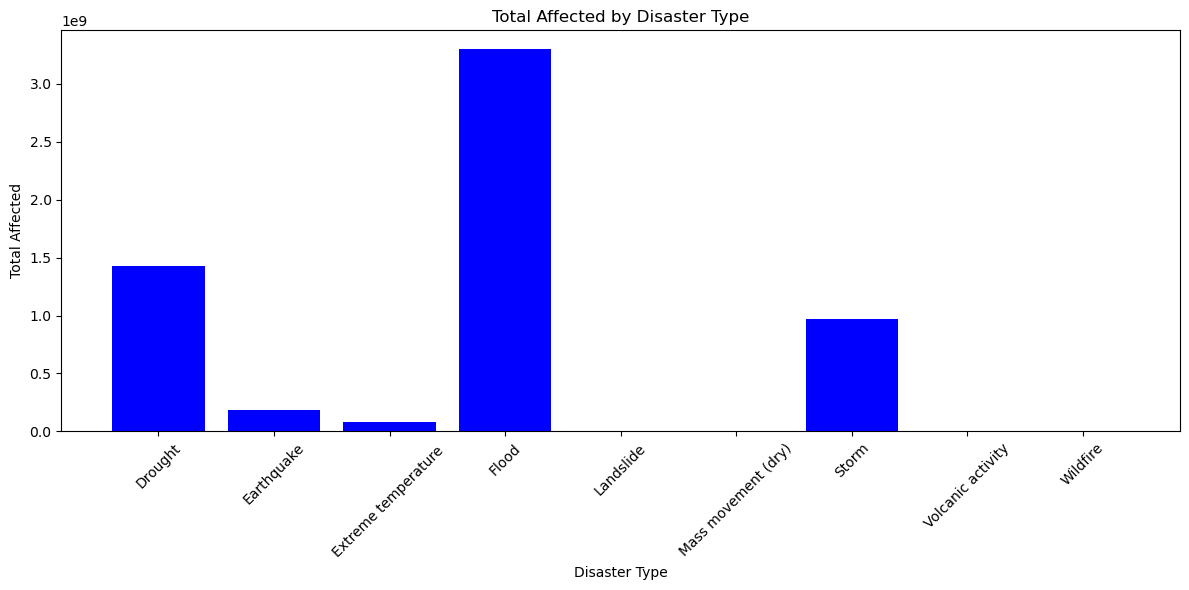

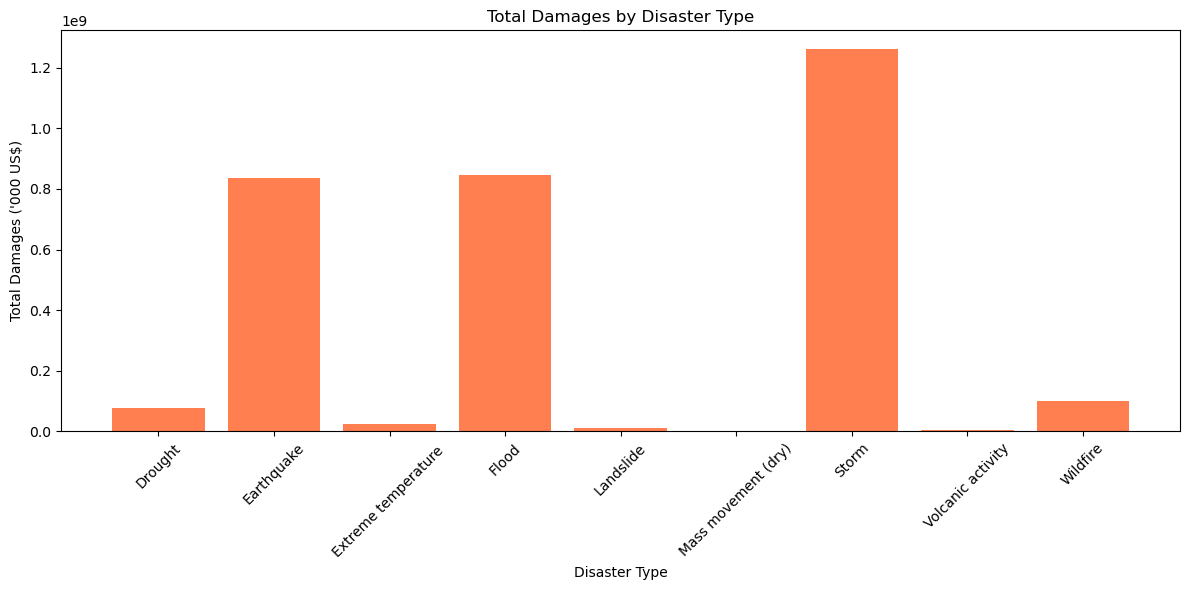

In [272]:
#which disaaster was most destructive (based on number of total effective and Total Damages )
selected_columns = ['Disaster Type', 'Total Affected', "Total Damages ('000 US$)"]

# Filter the DataFrame to keep only the selected columns
filtered_df = clean_disaster_metadata[selected_columns]

# Drop rows with NaN values in the selected columns
cleaned_df = filtered_df.dropna(subset=['Total Affected', "Total Damages ('000 US$)"])
cleaned_df
disaster_impact = cleaned_df.groupby('Disaster Type').agg({
    'Total Affected': 'sum',
    "Total Damages ('000 US$)": 'sum'
}).reset_index()

# Plotting Total Affected
plt.figure(figsize=(12, 6))
plt.bar(disaster_impact['Disaster Type'], disaster_impact['Total Affected'], color='blue')
plt.xlabel('Disaster Type')
plt.ylabel('Total Affected')
plt.title('Total Affected by Disaster Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("output_data/Fig8.png", bbox_inches='tight')
plt.show()

# Plotting Total Damages
plt.figure(figsize=(12, 6))
plt.bar(disaster_impact['Disaster Type'], disaster_impact["Total Damages ('000 US$)"], color='coral')
plt.xlabel('Disaster Type')
plt.ylabel('Total Damages (\'000 US$)')
plt.title('Total Damages by Disaster Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("output_data/Fig9.png")
plt.show()

In [273]:
#Printing the head table for the presentation
country_short = country_aggregation_df.head()
country_short.to_csv("output_data/country_coordinates2.csv", index_label="country_coordinates2")   


/var/folders/88/s9w214wx7036sclkp3xhfnh40000gn/T/ipykernel_33251/2552785969.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)  # Fill other NaN values with 0


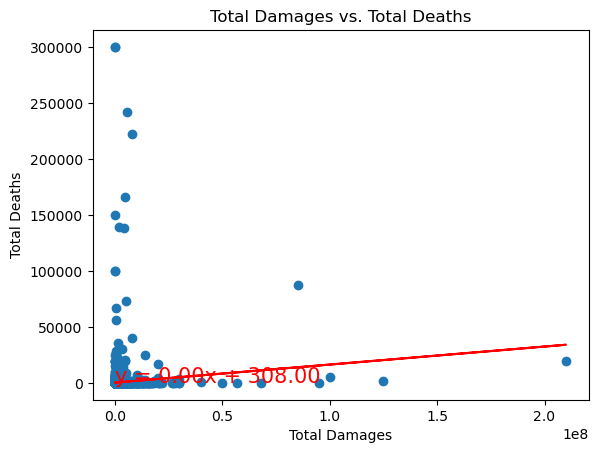

R-squared value: 0.0070522018018555396


In [274]:
def linear_regression_plot(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = st.linregress(x_values, y_values)
    
    # Get regression line values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the regression line equation
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    #Print plot
    plt.savefig("output_data/Fig10.png", bbox_inches='tight')
    
    # Show the plot
    plt.show()
    
    return r_value

df = clean_disaster_metadata.dropna(subset=['Total Deaths'])  # Drop rows where 'Total Deaths' is NaN
df.fillna(0, inplace=True)  # Fill other NaN values with 0

# Example usage of the function
x_values = df["Total Damages ('000 US$)"]
y_values = df['Total Deaths']

r_value = linear_regression_plot(x_values, y_values, 'Total Damages', 'Total Deaths', 'Total Damages vs. Total Deaths')


print(f"R-squared value: {r_value**2}")